# Suicide Rates Overview 1985 to 2016

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Open dataset and consider it's head

In [2]:
data = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
data = data.drop(['country-year','HDI for year'],axis=1)
print(data.shape)
data.head()

(27820, 10)


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


First look at numerical features:

In [4]:
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


Here you can see map with missing countries in this dataset. This is important information, and we can suggest that situation with suicide in these countries is bad. <br>
It should be noted that our dataset is offset and not completely objective.

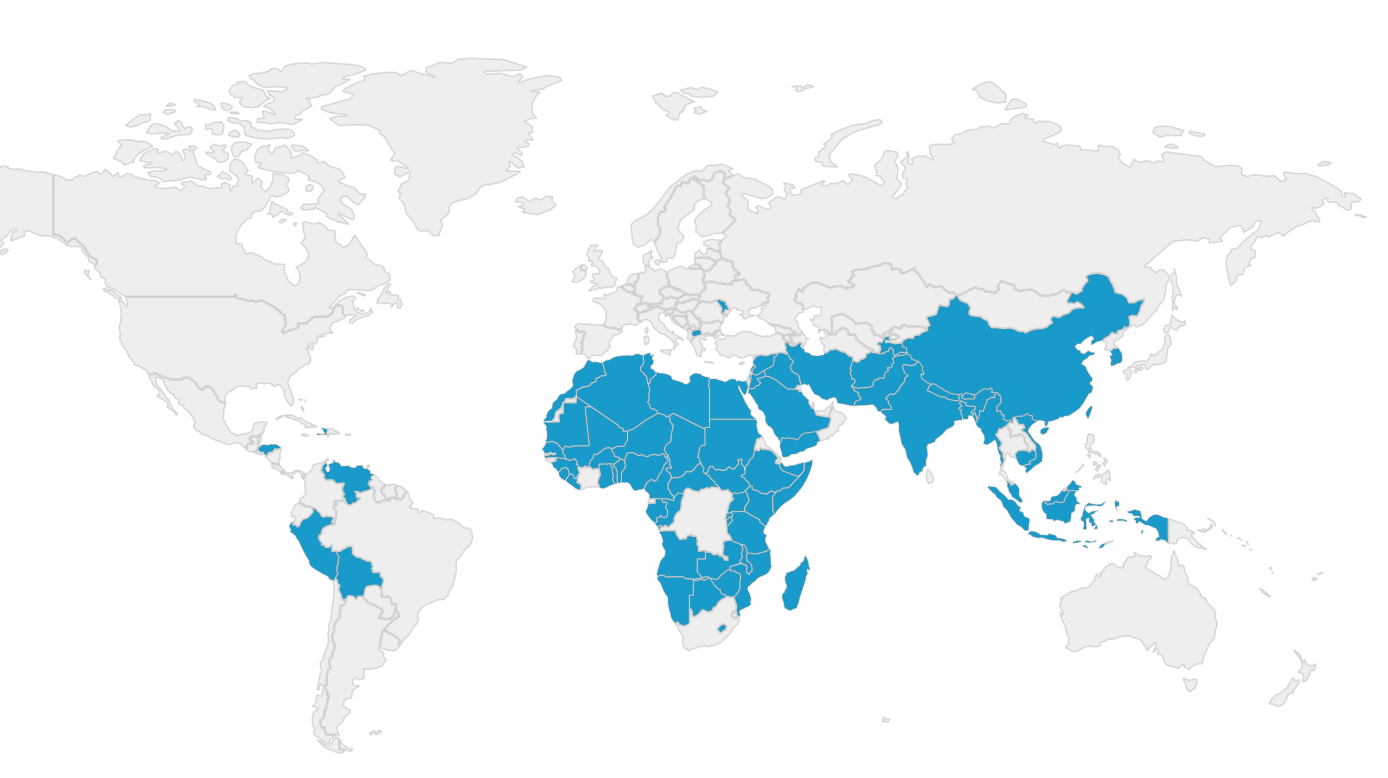

In [5]:
from IPython.display import Image
Image('../input/country/missed countries.png')

Count of suicides for 31 years. Note that not all countries are included in this list! This is extremely important.

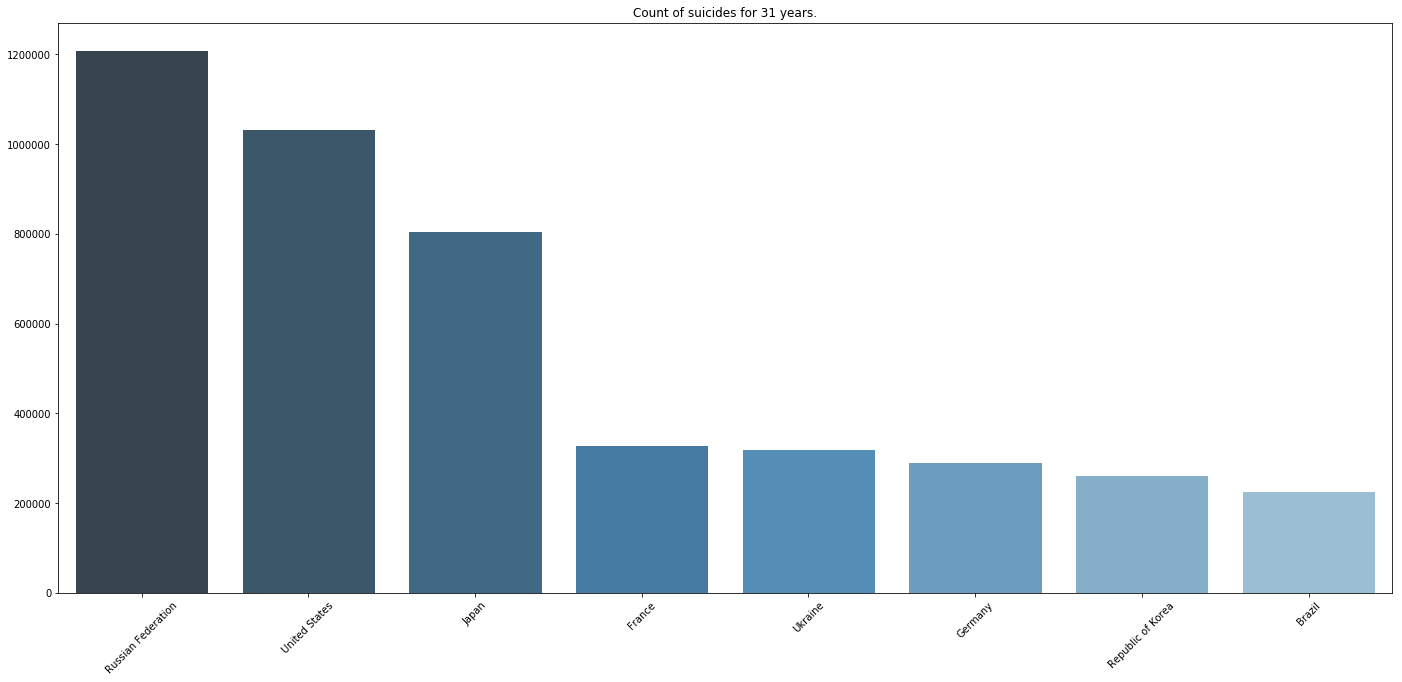

In [6]:
suic_sum = pd.DataFrame(data['suicides_no'].groupby(data['country']).sum())
suic_sum = suic_sum.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont = suic_sum.head(8)
fig = plt.figure(figsize=(20,10))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='country',data=most_cont,palette="Blues_d")
plt.xticks(rotation=45)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

In [7]:
from mpl_toolkits.basemap import Basemap
concap = pd.read_csv('../input/world-capitals-gps/concap.csv')
concap.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [8]:
def reg(x):
    if x=='Russia':
        res = 'Russian Federation'
    else:
        res=x
    return res
concap['CountryName'] = concap['CountryName'].apply(reg)

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_sum,left_on='CountryName',right_on='country')

Consider it on the map. I will remind you, that many big (by population) countries aren't included in this dataset.

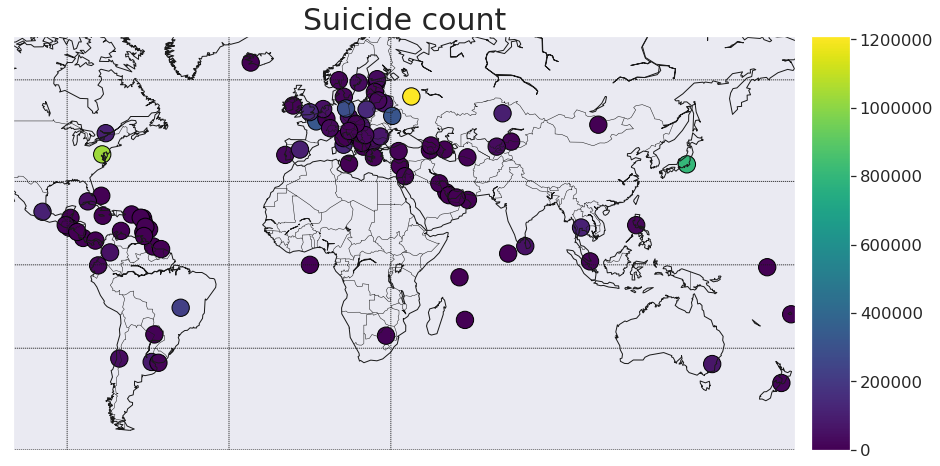

In [9]:
def mapWorld(col1,size2,title3,label4,metr=100,colmap='hot'):
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-110,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full[col1].values
    if size2:
        a_2 = data_full[size2].values
    else: a_2 = 1
    m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,linewidth=1,edgecolors='black',cmap=colmap, alpha=1)
    
    cbar = m.colorbar()
    cbar.set_label(label4,fontsize=30)
    plt.title(title3, fontsize=30)
    plt.show()
sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
mapWorld(col1='suicides_no', size2=False,title3='Suicide count',label4='',metr=300,colmap='viridis')

Compare it with map - gdp_per_capita ($)

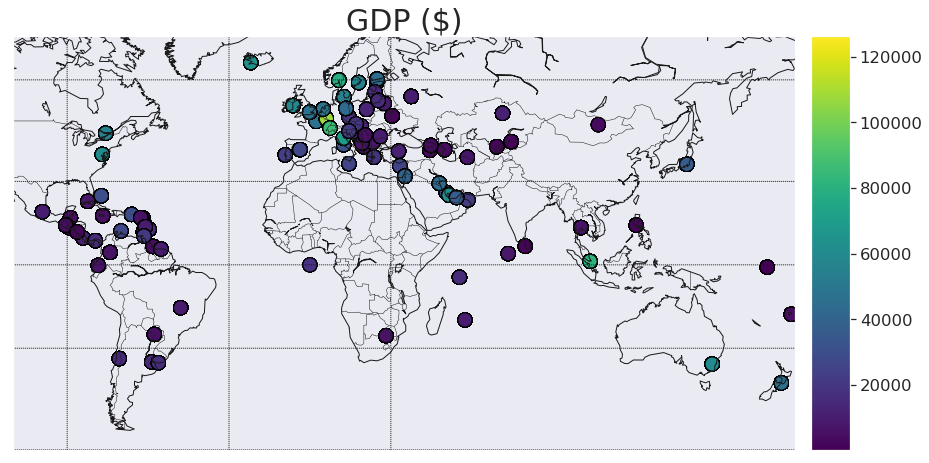

In [10]:
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         data,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='gdp_per_capita ($)', size2=False,title3='GDP ($)',label4='',metr=200,colmap='viridis')

Consider same barplot with with gender difference:

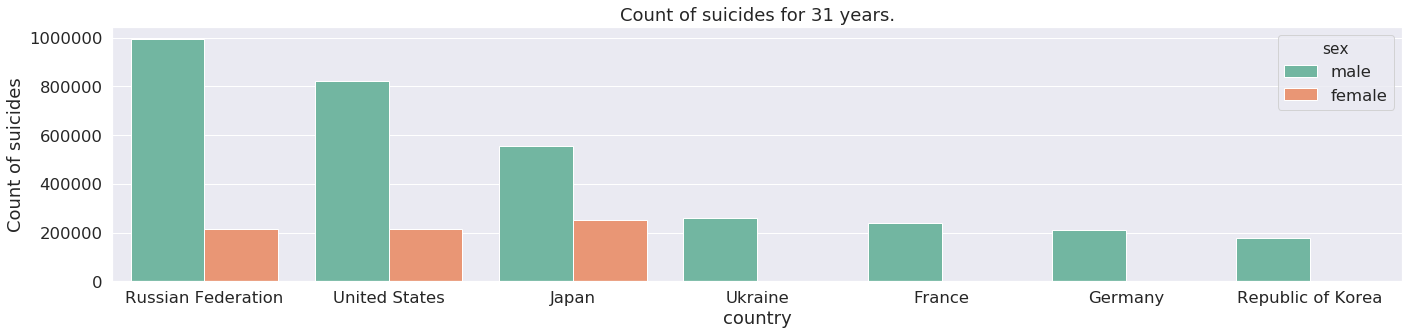

In [11]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_m = suic_sum_m.head(10)
most_cont_m.head(10)
fig = plt.figure(figsize=(20,5))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=1.5)
sns.barplot(y='suicides_no',x='country',hue='sex',data=most_cont_m,palette='Set2');
plt.ylabel('Count of suicides')
plt.tight_layout()

Compare this with statistics - suicides/100k pop.

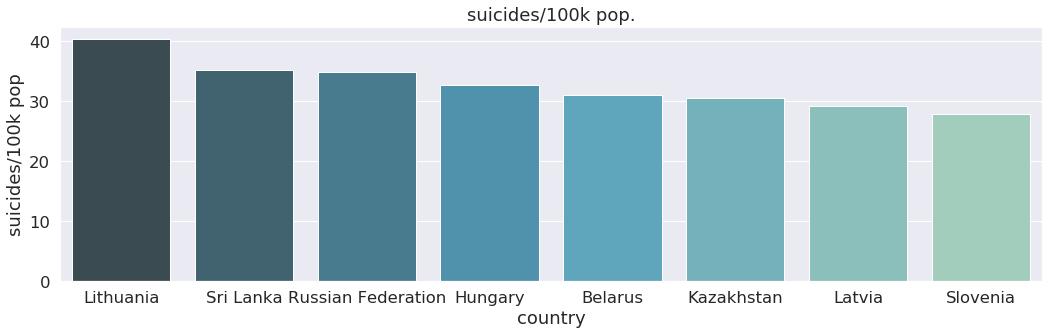

In [12]:
suic_mean = pd.DataFrame(data['suicides/100k pop'].groupby(data['country']).mean())
suic_mean = suic_mean.reset_index()
suic_mean_most = suic_mean.sort_index(by='suicides/100k pop',ascending=False).head(8)

fig = plt.figure(figsize=(15,5))
plt.title('suicides/100k pop.')
#sns.set(font_scale=1.5)
sns.barplot(y='suicides/100k pop',x='country',data=suic_mean_most,palette="GnBu_d");
plt.ylabel('suicides/100k pop')
plt.tight_layout()

Let's divide data into old and new:

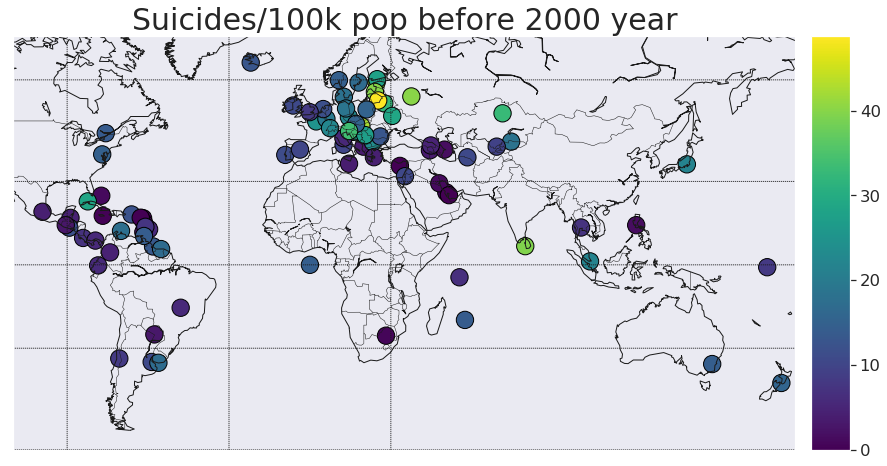

In [13]:
data_past = data[data['year']<2000]
suic_mean = pd.DataFrame(data_past['suicides/100k pop'].groupby(data_past['country']).mean())
suic_mean = suic_mean.reset_index()
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_mean,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='suicides/100k pop', size2=False,title3='Suicides/100k pop before 2000 year',label4='',metr=300,colmap='viridis')

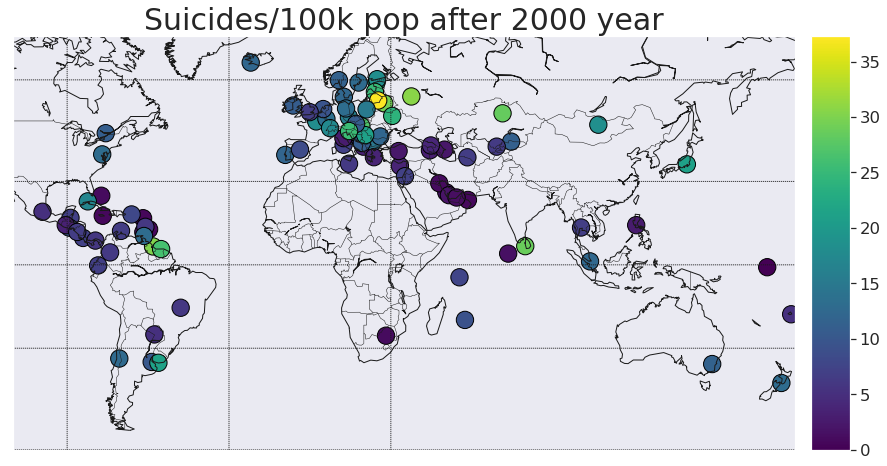

In [14]:
data_last = data[data['year'] > 2000]
suic_mean = pd.DataFrame(data_last['suicides/100k pop'].groupby(data_last['country']).mean())
suic_mean = suic_mean.reset_index()
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_mean,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='suicides/100k pop', size2=False,title3='Suicides/100k pop after 2000 year',label4='',metr=300,colmap='viridis')

Here we can see count of suicides by year distribution:

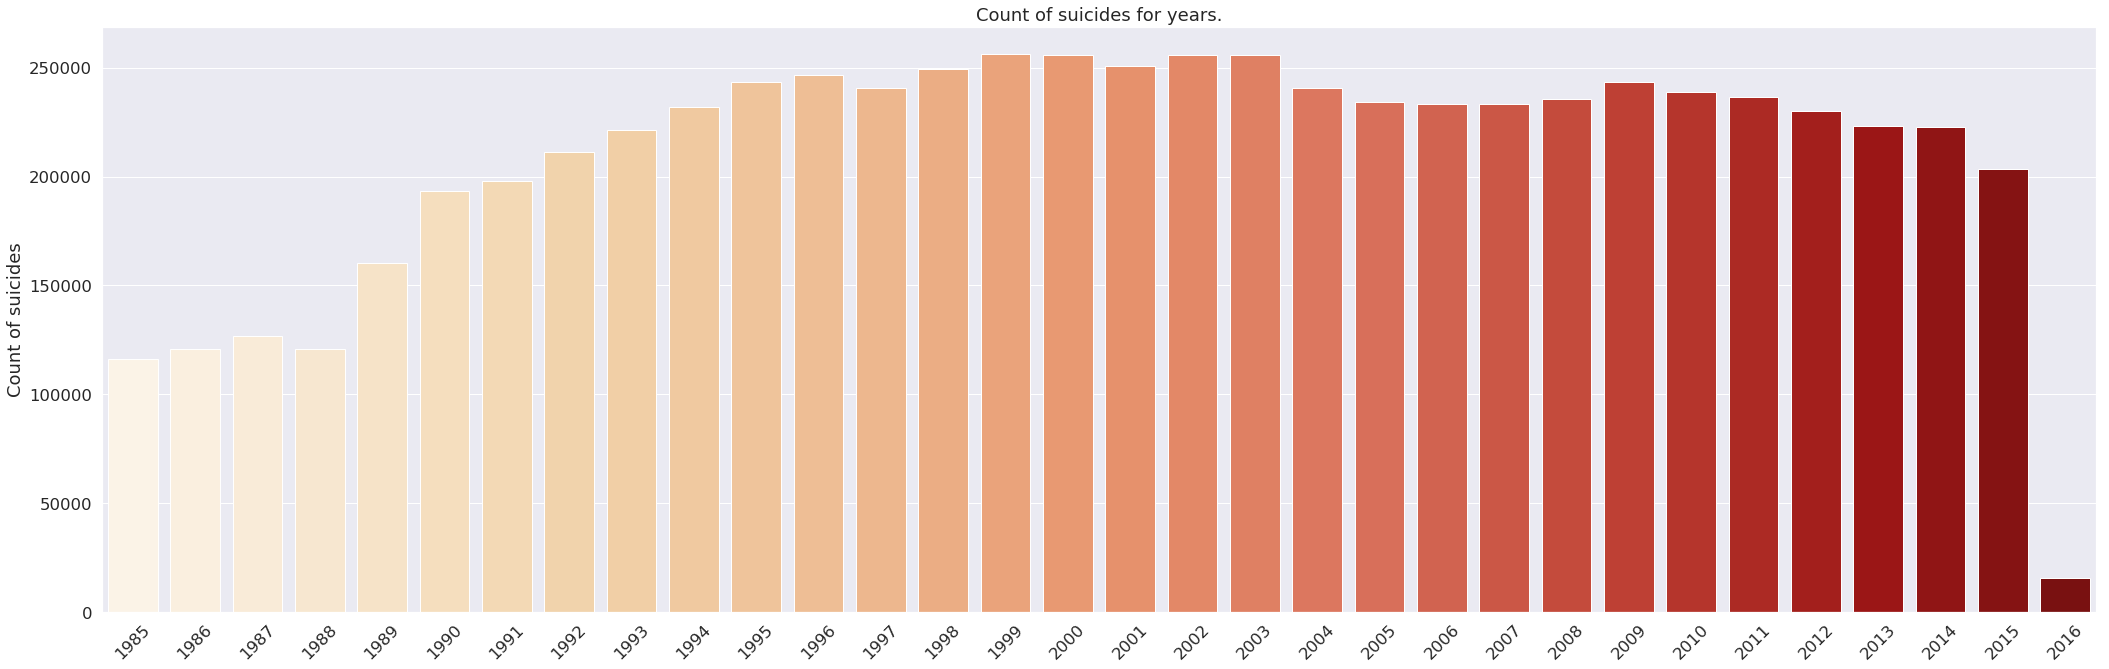

In [15]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby(data['year']).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('Count of suicides for years.')
sns.set(font_scale=2.5)
sns.barplot(y='suicides_no',x='year',data=most_cont_yr,palette="OrRd");
plt.ylabel('Count of suicides')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()

What is the most critical age group?

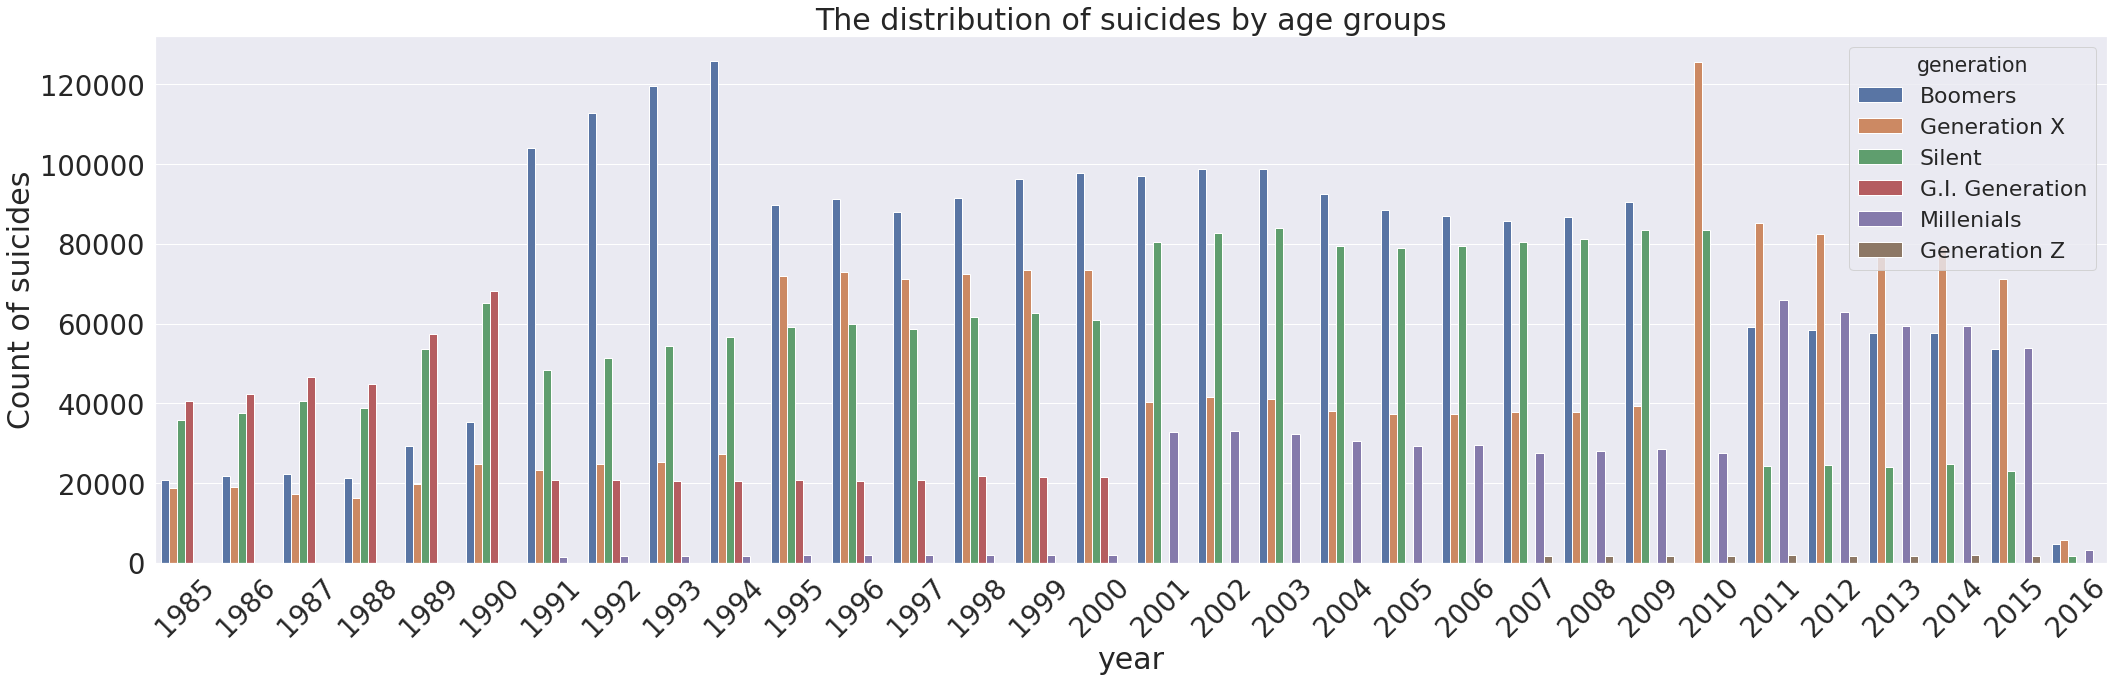

In [16]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby([data['generation'],data['year']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('The distribution of suicides by age groups')

sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='year',hue='generation',data=most_cont_yr,palette='deep');
plt.ylabel('Count of suicides')
plt.xticks(rotation=45)
plt.tight_layout()

In [17]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby([data['generation'],data['country']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont = suic_sum_yr

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         most_cont,left_on='CountryName',right_on='country')

For this map, color - generation, size - suicides_no

 Generation X:100 
 Silent:200 
 G.I. Generation:300 
 Boomers:400 
 Millenials:500 
 Generation Z:600


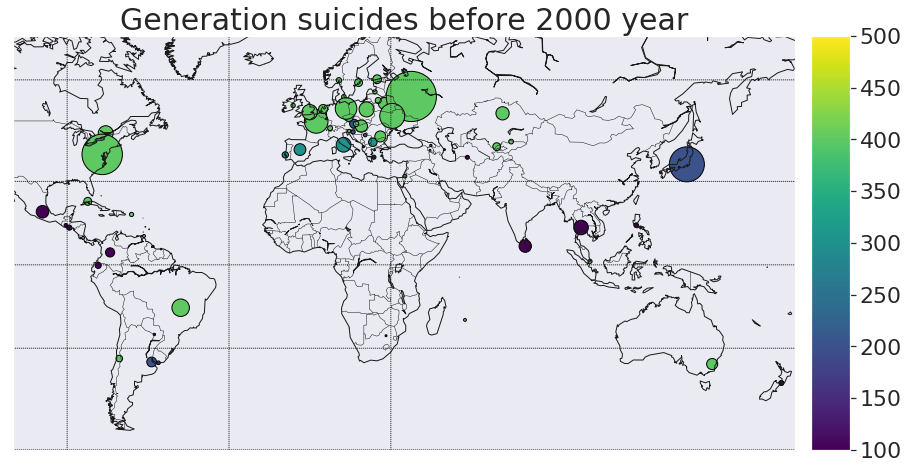

In [18]:
data_new = data[data['year']<2000]
title_map = 'Generation suicides before 2000 year'
data_gener = pd.DataFrame(data_new['suicides_no'].groupby([data_new['generation'],data_new['country']]).sum()).reset_index()
age_max = pd.DataFrame(data_gener['suicides_no'].groupby(data_gener['country']).max()).reset_index()
gen_full = pd.merge(age_max,data_gener,left_on=['suicides_no','country'],right_on=['suicides_no','country'])

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         gen_full,left_on='CountryName',right_on='country')
data_full.dropna(inplace=True)

def gener(x):
    dic_t = {'Generation X':100,'Silent':200,'G.I. Generation':300,'Boomers':400,'Millenials':500,'Generation Z':600}
    return dic_t[x]
data_full.generation = data_full.generation.apply(gener)
print(" Generation X:100 \n Silent:200 \n G.I. Generation:300 \n Boomers:400 \n Millenials:500 \n Generation Z:600")
plt.figure(figsize=(15,15))
mapWorld(col1='generation', size2='suicides_no', title3=title_map,label4='',metr=0.01,colmap='viridis')

 Generation X:100 
 Silent:200 
 G.I. Generation:300 
 Boomers:400 
 Millenials:500 
 Generation Z:600


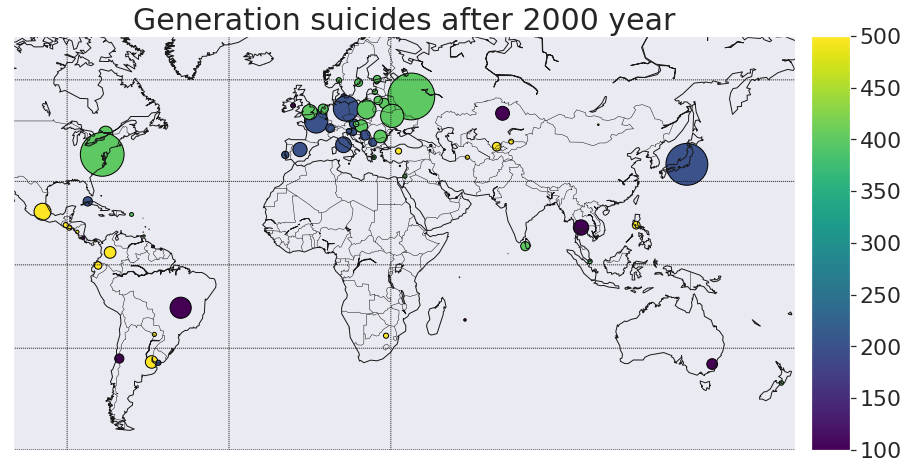

In [19]:
data_new = data[data['year']>=2000]
title_map = 'Generation suicides after 2000 year'
data_gener = pd.DataFrame(data_new['suicides_no'].groupby([data_new['generation'],data_new['country']]).sum()).reset_index()
age_max = pd.DataFrame(data_gener['suicides_no'].groupby(data_gener['country']).max()).reset_index()
gen_full = pd.merge(age_max,data_gener,left_on=['suicides_no','country'],right_on=['suicides_no','country'])

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         gen_full,left_on='CountryName',right_on='country')
data_full.dropna(inplace=True)

def gener(x):
    dic_t = {'Generation X':100,'Silent':200,'G.I. Generation':300,'Boomers':400,'Millenials':500,'Generation Z':600}
    return dic_t[x]
data_full.generation = data_full.generation.apply(gener)
print(" Generation X:100 \n Silent:200 \n G.I. Generation:300 \n Boomers:400 \n Millenials:500 \n Generation Z:600")
plt.figure(figsize=(15,15))
mapWorld(col1='generation', size2='suicides_no', title3=title_map,label4='',metr=0.01,colmap='viridis')

Thank you for reading! I hope this kernel was helpful for you. <br>
If you like same map visualization, you can see my other kernels:
https://www.kaggle.com/nikitagrec/kernels